# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.mode.chained_assignment = None
%matplotlib inline

# Merge the same manufacturer to one DataFrame

Because the site blocked the ads to only 200 so we had to collect on each vehicle in several links so we created a method that connects the same manufacturer of vehicle to one dataframe

In [2]:
def mergeSameCar4(path1,path2,path3,path4,name):
    
    df1 = pd.read_csv(path1)
    df2 = pd.read_csv(path2)
    df3 = pd.read_csv(path3)
    df4 = pd.read_csv(path4)

    df = df1.append(df2, ignore_index=True) 
    df = df.append(df3, ignore_index=True) 
    df = df.append(df4, ignore_index=True) 
    
    df.to_csv(name)

In [3]:
def mergeSameCar3(path1,path2,path3,name):
    
    df1 = pd.read_csv(path1)
    df2 = pd.read_csv(path2)
    df3 = pd.read_csv(path3)
    
    df = df1.append(df2, ignore_index=True) 
    df = df.append(df3, ignore_index=True) 

    df.to_csv(name)

In [4]:
def mergeSameCar2(path1,path2,name):
    
    df1 = pd.read_csv(path1)
    df2 = pd.read_csv(path2)
    
    df = df1.append(df2, ignore_index=True) 

    df.to_csv(name)

In [5]:
mergeSameCar4("./df_hyundai1.csv","./df_hyundai2.csv","./df_hyundai3.csv","./df_hyundai4.csv",'df_hyundai.csv')
mergeSameCar4("./df_volkswagen1.csv","./df_volkswagen2.csv","./df_volkswage3.csv","./df_volkswagen4.csv",'df_volkswagen.csv')
mergeSameCar2("./df_suzuki1.csv","./df_suzuki2.csv",'df_suzuki.csv')
mergeSameCar2("./df_kia1.csv","./df_kia2.csv",'df_kia.csv')
mergeSameCar2('./df_honda1.csv','./df_honda2.csv','df_honda.csv')
mergeSameCar3("./df_mercedes1.csv","./df_mercedes2.csv","./df_mercedes3.csv",'df_mercedes.csv')
mergeSameCar4("./df_toyota1.csv","./df_toyota2.csv","./df_toyota3.csv","./df_toyota4.csv",'df_toyota.csv')
mergeSameCar4("./df_mazda1.csv","./df_mazda2.csv","./df_mazda3.csv","./df_mazda4.csv",'df_mazda.csv')
mergeSameCar4("./df_skoda1.csv","./df_skoda2.csv","./df_skoda3.csv","./df_skoda4.csv",'df_skoda.csv')

# Loading all the csv to DataFrame

At the data acquisition stage we saved all the data in csv files.
To clear the data we need to load it into the dataframe

In [6]:
df_hyundai = pd.read_csv('./df_hyundai.csv')
df_volkswagen = pd.read_csv('./df_volkswagen.csv')
df_kia = pd.read_csv('./df_kia.csv')
df_suzuki = pd.read_csv('./df_suzuki.csv')
df_mercedes = pd.read_csv('./df_mercedes.csv')
df_toyota = pd.read_csv('./df_toyota.csv')
df_mazda = pd.read_csv('./df_mazda.csv')
df_skoda = pd.read_csv('./df_skoda.csv')
df_chevrolet = pd.read_csv('./df_chevrolet.csv')
df_honda = pd.read_csv('./df_honda.csv')
df_seat = pd.read_csv('./df_seat.csv')
df_bmw = pd.read_csv('./df_bmw.csv')
df_renault = pd.read_csv('./df_renault.csv')
df_peugeot = pd.read_csv('./df_peugeot.csv')
df_ford = pd.read_csv('./df_ford.csv')
df_audi = pd.read_csv('./df_audi.csv')
df_subaru = pd.read_csv('./df_subaru.csv')
df_citroen = pd.read_csv('./df_citroen.csv')
df_opel = pd.read_csv('./df_opel.csv')
df_mitsubishi = pd.read_csv('./df_mitsubishi.csv')
df_nissan = pd.read_csv('./df_nissan.csv')
df_fiat = pd.read_csv('./df_fiat.csv')
df_volvo = pd.read_csv('./df_volvo.csv')
df_alphaRomeo = pd.read_csv('./df_alphaRomeo.csv')
df_daihatsu = pd.read_csv('./df_daihatsu.csv')
df_mini = pd.read_csv('./df_mini.csv')

### fix data in table method

* The method splits all the connect information from the data acquisition part.
* The method create separate column for the each data.
* The method also remove unnecessary marks like NIS mark in the price column.

In [7]:
def fixDataInTable(df, hand_number):
    
    df['Model'] = [d.split(',')[0] for d in df['year hand kilimeter']]
    df['year_hand'] = [d.split(',')[1] for d in df['year hand kilimeter']]
    df['Year'] = [d.split('\n')[0] for d in df['year hand kilimeter']]
    df['hand_km'] = [d.split('\n')[1] for d in df['year hand kilimeter']]
    df = df.drop(['year_hand'],axis = 1)
    df['Year'] = [d.split(',')[1] for d in df['Year']]
    df['Year'] = [d.split(' ')[2] for d in df['Year']]
    df['Hand'] = [d.split(' ')[hand_number] for d in df['hand_km']]
    df['Kilometer'] = [d.split(' ')[hand_number+1] for d in df['hand_km']]
    df = df.drop(['hand_km'],axis = 1)
    df = df.drop(['year hand kilimeter'],axis = 1)
    df['gearbox_kilometer'] = [d.split('\n')[0] for d in df['gearbox color engine capacity area']]
    df['engine_color'] = [d.split('\n')[1] for d in df['gearbox color engine capacity area']]
    df['Area'] = [d.split('\n')[2] for d in df['gearbox color engine capacity area']]
    df['Gearbox'] = [d.split(' ')[2] for d in df['gearbox_kilometer']]
    df['Engine capcity'] = [d.split(',')[1] for d in df['engine_color']]
    df['Color'] = [d.split(',')[0] for d in df['engine_color']]
    df['Area'] = [d.split(':')[1] for d in df['Area']]
    df = df.drop(['gearbox color engine capacity area'],axis = 1)
    df = df.drop(['gearbox_kilometer'],axis = 1)
    df = df.drop(['engine_color'],axis = 1)
    df['Engine capcity'] = [d.split(' ')[2] for d in df['Engine capcity']]
    df['price'] = [d.split('₪')[0] for d in df['price']]
    
    return df

### drop cols method

* The method drop unncassrt information form the columns.
    * 'שם סוכנות' for example.
    
* The method drop unnecessary columns.
    * 'Unnamed: 0.1'
    * ''Model'
    
* The method drop duplicate rows.
* The method drop 'None' values

In [8]:
def dropCols(df):
    
    df['Area'] = [d.split('שם סוכנות')[0] for d in df['Area']]
    if 'Unnamed: 0.1' in df.columns: 
        df = df.drop(['Unnamed: 0.1'],axis = 1)
        
    df = df.drop(['Unnamed: 0'],axis = 1)
    df = df.drop(['Model'],axis = 1)
    df = df.drop_duplicates()
    df = df.dropna()
    
    return df

### outliers method 

* The method drop outliers by IQR.
* We multiply the IQR in the right side because the IQR removed good values.
    * Price bigger than 305,000.
    * Hand bigger then 6.
    * Kilometer bigger then 344,000.
    * Engine capcity bigger then 4143.
    * Year bigger then 2023.

In [9]:
def outliers(df,col_name):
    
    sns.boxplot(x = df[col_name])
    
    Q1 = np.percentile(df[col_name] , 25)
    Q3 = np.percentile(df[col_name] , 75)
    IQR = Q3 - Q1
    
    if col_name == 'price' or col_name == 'Engine capcity':
        multiIQR = 5
    elif col_name == 'Hand':
        multiIQR = 3
    elif col_name == 'Kilometer':
        multiIQR = 1.5
    else:
        multiIQR = 1
    
    print(Q3 + multiIQR * IQR)
    
    # we mulitply the right side becouse luxury vehicles or high kilometer..
    df[col_name][(df[col_name] < Q1 - IQR ) | (df[col_name] > Q3 + multiIQR*IQR)] = np.nan
    df = df[df[col_name].notna()]
    
    return df

### convertion method

* The conversion method convert the unnecessary data to null for example:
    * 'יד'
    * 'לא צוין מחיר'
* The conversion method remove symbols that is not numbers like comma.


In [10]:
def convertion(df):
    
    replace_price = {'לא צוין מחיר':None}
    df = df.replace(replace_price)
    
    replace_hand = {'יד':None}
    df = df.replace(replace_hand)
    
    # Removing the comma from the price
    df['price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    df['Kilometer'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    df['Hand'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

    replace_none = {'':None}
    df = df.replace(replace_none)

    return df

### replace to int method 

The method convert from object to int values.

In [11]:
def replace_to_int(df):
    
    for col in df.columns:
        if col == 'Hand':
            df[col] = df[col].astype(int)
        if col == 'price':
            df[col] = df[col].astype(int)
        if col == 'Kilometer':
            df[col] = df[col].astype(int)
        if col == 'Engine capcity':
            df[col] = df[col].astype(int)
        if col == 'Year':
            df[col] = df[col].astype(int)

    return df

### merge all cars method 

The method merge all the data frames to one big dataframe.

In [12]:
def mergeAllCars():
    
    df_all_cars = df_hyundai.append(df_volkswagen, ignore_index=True)
    df_all_cars = df_all_cars.append(df_kia, ignore_index=True)
    df_all_cars = df_all_cars.append(df_suzuki, ignore_index=True)
    df_all_cars = df_all_cars.append(df_mercedes, ignore_index=True)
    df_all_cars = df_all_cars.append(df_toyota, ignore_index=True)
    df_all_cars = df_all_cars.append(df_mazda, ignore_index=True)
    df_all_cars = df_all_cars.append(df_skoda, ignore_index=True)
    df_all_cars = df_all_cars.append(df_chevrolet, ignore_index=True)
    df_all_cars = df_all_cars.append(df_honda, ignore_index=True)
    df_all_cars = df_all_cars.append(df_seat, ignore_index=True)
    df_all_cars = df_all_cars.append(df_bmw, ignore_index=True)
    df_all_cars = df_all_cars.append(df_renault, ignore_index=True)
    df_all_cars = df_all_cars.append(df_peugeot, ignore_index=True)
    df_all_cars = df_all_cars.append(df_ford, ignore_index=True)
    df_all_cars = df_all_cars.append(df_audi, ignore_index=True)
    df_all_cars = df_all_cars.append(df_subaru, ignore_index=True)
    df_all_cars = df_all_cars.append(df_citroen, ignore_index=True)
    df_all_cars = df_all_cars.append(df_opel, ignore_index=True)
    df_all_cars = df_all_cars.append(df_mitsubishi, ignore_index=True)
    df_all_cars = df_all_cars.append(df_nissan, ignore_index=True)
    df_all_cars = df_all_cars.append(df_fiat, ignore_index=True)
    df_all_cars = df_all_cars.append(df_volvo, ignore_index=True)
    df_all_cars = df_all_cars.append(df_alphaRomeo, ignore_index=True)
    df_all_cars = df_all_cars.append(df_daihatsu, ignore_index=True)
    df_all_cars = df_all_cars.append(df_mini, ignore_index=True)
    
    return df_all_cars

# Fixing DataFrame by manufacturer

* In this section we call for all the methods we have built.
* We also show the head of the table before merging to the big dataframe.

In [13]:
df_hyundai = fixDataInTable(df_hyundai,15)

df_hyundai['manufacturer'] = [d.split('י')[1] for d in df_hyundai['Model']]
df_hyundai['type'] = [d.split('יונדאי')[1] for d in df_hyundai['Model']]
replace_map = {'ונדא':'יונדאי'}
df_hyundai = df_hyundai.replace(replace_map)

df_hyundai.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,"28,000",יונדאי i10,2014,3,"158,000",פתח תקוה והסביבהשם סוכנות,אוטומטית,1000,שחור,יונדאי,i10
1,1,1,"30,000",יונדאי i20,2013,5,"117,000",מושבים בשפלה,אוטומטית,1400,אפור,יונדאי,i20
2,2,2,"33,000",יונדאי i25,2011,3,"105,000",נס ציונה - רחובות,אוטומטית,1560,אפור,יונדאי,i25
3,3,3,"28,000",יונדאי i30cw,2013,2,"220,000",פתח תקוה והסביבה,אוטומטית,1590,כחול מטאלי,יונדאי,i30cw
4,4,4,לא צוין מחיר,יונדאי טרג’ט,2006,0,"210,000",פתח תקוה והסביבהשם סוכנות,אוטומטית,2700,כחול כהה,יונדאי,טרג’ט


In [14]:
df_kia = fixDataInTable(df_kia,15)

df_kia['manufacturer'] = [d.split('ה')[0] for d in df_kia['Model']]
df_kia['type'] = [d.split('קיה')[1] for d in df_kia['Model']]
replace_map = {'קי':'קיה'}
df_kia = df_kia.replace(replace_map)

df_kia.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,"30,000",קיה קרניבל,2011,2,"182,000",נס ציונה - רחובות,אוטומטית,2902,שחור,קיה,קרניבל
1,1,1,"44,000",קיה פיקנטו,2017,2,"52,487,797",רמלה - לוד,אוטומטית,1248,,קיה,פיקנטו
2,2,2,"76,500",קיה פיקנטו,2019,2,"32,250",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1248,שחור,קיה,פיקנטו
3,3,3,"103,000",קיה נירו הייבריד,2019,יד,1,חיפה וחוף הכרמלשם סוכנות,אוטומטית,1580,טורקיז,קיה,נירו הייבריד
4,4,4,"89,000",קיה ריו,2020,1,"8,100",רמת השרון - הרצליה,אוטומטית,1000,שחור,קיה,ריו


In [15]:
df_volkswagen = fixDataInTable(df_volkswagen,15)

df_volkswagen['manufacturer'] = [d.split('ן')[0] for d in df_volkswagen['Model']]
df_volkswagen['type'] = [d.split('פולקסווגן')[1] for d in df_volkswagen['Model']]
replace_map = {'פולקסווג':'פולקסווגן'}
df_volkswagen = df_volkswagen.replace(replace_map)

df_volkswagen.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,לא צוין מחיר,פולקסווגן פאסאט,2017,1,"154,000",נתניה והסביבהשם סוכנות,אוטומטית,1798,,פולקסווגן,פאסאט
1,1,1,"62,000",פולקסווגן גולף,2015,2,"87,000",גדרה יבנה והסביבה,אוטומטית,1395,כסוף מטאלי,פולקסווגן,גולף
2,2,2,"88,000",פולקסווגן פולו,2015,2,"97,000",מושבים בשרוןשם סוכנות,אוטומטית,1800,,פולקסווגן,פולו
3,3,3,"135,000",פולקסווגן גולף GTI,2015,יד,2,מושבים בצפוןשם סוכנות,אוטומטית,2000,שחור מטאלי,פולקסווגן,גולף GTI
4,4,4,"31,000",פולקסווגן פולו,2012,4,"195,650",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1197,כסוף מטאלי,פולקסווגן,פולו


In [16]:
df_suzuki = fixDataInTable(df_suzuki,15)

df_suzuki['manufacturer'] = [d.split('ק')[0] for d in df_suzuki['Model']]
df_suzuki['type'] = [d.split('סוזוקי')[1] for d in df_suzuki['Model']]
replace_map = {'סוזו':'סוזוקי'}
df_suzuki = df_suzuki.replace(replace_map)

df_suzuki.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,"7,000",סוזוקי סוויפט,2001,4,"42,300",רמת גן - גבעתיים,אוטומטית,1300,אפור,סוזוקי,סוויפט
1,1,1,"65,000",סוזוקי איגניס,2017,1,"21,500",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1242,כחול,סוזוקי,איגניס
2,2,2,"17,500",סוזוקי אלטו,2011,3,"100,000",ירושלים והסביבה,ידנית,996,שחור,סוזוקי,אלטו
3,3,3,"9,000",סוזוקי איגניס,2005,2,"240,000",עמק יזרעאל,אוטומטית,1300,אדום,סוזוקי,איגניס
4,4,4,"63,000",סוזוקי SX4,2017,2,"156,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1373,כחול,סוזוקי,SX4


In [17]:
df_mercedes = fixDataInTable(df_mercedes,15)

df_mercedes['manufacturer'] = [d.split('ס')[0] for d in df_mercedes['Model']]
df_mercedes['type'] = [d.split('מרצדס')[1] for d in df_mercedes['Model']]
replace_map = {'מרצד':'מרצדס'}
df_mercedes = df_mercedes.replace(replace_map)

df_mercedes.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,"14,500",מרצדס C-CLASS,1999,4,"420,000",באר שבע והסביבה,אוטומטית,1998,זהב,מרצדס,C-CLASS
1,1,1,לא צוין מחיר,מרצדס A-CLASS,2015,2,"104,000",נתניה והסביבהשם סוכנות,אוטומטית,2000,אפור מטאלי,מרצדס,A-CLASS
2,2,2,"43,000",מרצדס C-CLASS,2008,2,"249,000",כרמיאל והסביבה,אוטומטית,1796,כסוף,מרצדס,C-CLASS
3,3,3,"300,000",מרצדס A-CLASS,2021,1,"2,000",רמלה - לוד,אוטומטית,1332,שחור,מרצדס,A-CLASS
4,4,4,"19,000",מרצדס C-CLASS,2008,5,"500,000",מושבים בשרון,אוטומטית,2149,לבן,מרצדס,C-CLASS


In [18]:
df_toyota = fixDataInTable(df_toyota,15)

df_toyota['manufacturer'] = [d.split('ה')[0] for d in df_toyota['Model']]
df_toyota['type'] = [d.split('טויוטה')[1] for d in df_toyota['Model']]
replace_map = {'טויוט':'טויוטה'}
df_toyota = df_toyota.replace(replace_map)

df_toyota.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,"66,000",טויוטה אייגו,2020,1,"6,200",חיפה וחוף הכרמלשם סוכנות,אוטומטית,998,אפור מטאלי,טויוטה,אייגו
1,1,1,"64,000",טויוטה אוריס,2015,2,"120,000",בית שמש והסביבה,אוטומטית,1798,אפור עכבר,טויוטה,אוריס
2,2,2,"58,000",טויוטה אוריס,2016,1,"198,000",הוד השרון והסביבה,אוטומטית,1798,,טויוטה,אוריס
3,3,3,לא צוין מחיר,טויוטה קאמרי,2009,3,"134,000",נס ציונה - רחובותשם סוכנות,אוטומטית,2400,לבן מטאלי,טויוטה,קאמרי
4,4,4,"29,500",טויוטה יאריס,2012,1,"229,000",זכרון - בנימינה,ידנית,1300,אדום מטאלי,טויוטה,יאריס


In [19]:
df_mazda = fixDataInTable(df_mazda,15)

df_mazda['manufacturer'] = [d.split('ה')[0] for d in df_mazda['Model']]
df_mazda['type'] = [d.split('מאזדה')[1] for d in df_mazda['Model']]
replace_map = {'מאזד':'מאזדה'}
df_mazda = df_mazda.replace(replace_map)

df_mazda.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,"29,500",מאזדה 5,2007,2,"200,000",רמת גן - גבעתיים,אוטומטית,2000,לבן מטאלי,מאזדה,5
1,1,1,"14,500",מאזדה 3,2009,4,"210,000",נס ציונה - רחובותשם סוכנות,אוטומטית,1600,אפור,מאזדה,3
2,2,2,לא צוין מחיר,מאזדה 3,2010,3,"117,000",עכו - נהריהשם סוכנות,אוטומטית,1600,אפור מטאלי,מאזדה,3
3,3,3,"121,000",מאזדה 3,2020,2,"33,000",רמת גן - גבעתיים,אוטומטית,2000,כחול כהה מטאלי,מאזדה,3
4,4,4,"37,500",מאזדה 3,2012,2,"148,000",בקעת אונו,אוטומטית,2000,שחור,מאזדה,3


In [20]:
df_skoda = fixDataInTable(df_skoda,15)

df_skoda['manufacturer'] = [d.split('ה')[0] for d in df_skoda['Model']]
df_skoda['type'] = [d.split('סקודה')[1] for d in df_skoda['Model']]
replace_map = {'סקוד':'סקודה'}
df_skoda = df_skoda.replace(replace_map)

df_skoda.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,"13,000",סקודה רומסטר,2009,3,"175,000",פתח תקוה והסביבהשם סוכנות,טיפטרוניק,1600,לבן שנהב,סקודה,רומסטר
1,1,1,"120,000",סקודה סקאלה,2020,1,"16,500",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1498,שחור מטאלי,סקודה,סקאלה
2,2,2,"165,000",סקודה אוקטביה,2021,1,"12,000",באר שבע והסביבה,אוטומטית,1498,שחור,סקודה,אוקטביה
3,3,3,"140,000",סקודה סופרב,2018,1,"73,000",מודיעין והסביבה,אוטומטית,1395,אפור מטאלי,סקודה,סופרב
4,4,4,"160,000",סקודה סופרב,2019,2,"62,000",מושבים בצפון,אוטומטית,1798,כסוף מטאלי,סקודה,סופרב


In [21]:
df_chevrolet = fixDataInTable(df_chevrolet,15)

df_chevrolet['manufacturer'] = [d.split('ט')[0] for d in df_chevrolet['Model']]
df_chevrolet['type'] = [d.split('שברולט')[1] for d in df_chevrolet['Model']]
replace_map = {'שברול':'שברולט'}
df_chevrolet = df_chevrolet.replace(replace_map)

df_chevrolet.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,לא צוין מחיר,שברולט סוניק,2013,3,"133,000",נתניה והסביבהשם סוכנות,אוטומטית,1600,אפור עכבר,שברולט,סוניק
1,1,"11,000",שברולט קרוז,2011,4,"194,000",עכו - נהריה,אוטומטית,1600,,שברולט,קרוז
2,2,"111,000",שברולט אקווינוקס,2018,1,"100,000",נס ציונה - רחובות,אוטומטית,1500,לבן,שברולט,אקווינוקס
3,3,"6,500",שברולט אופטרה,2009,2,"244,000",באר שבע והסביבה,אוטומטית,1600,לבן,שברולט,אופטרה
4,4,"25,000",שברולט קרוז,2014,1,"300,000",עכו - נהריה,אוטומטית,1400,כסוף,שברולט,קרוז


In [22]:
df_honda = fixDataInTable(df_honda,15)

df_honda['manufacturer'] = [d.split('ה')[1] for d in df_honda['Model']]
df_honda['type'] = [d.split('הונדה')[1] for d in df_honda['Model']]
replace_map = {'ונד':'הונדה'}
df_honda = df_honda.replace(replace_map)

df_honda.head()

,Unnamed: 0,Unnamed: 0.1,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,0,לא צוין מחיר,הונדה FR-V,2007,1,"198,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1800,,הונדה,FR-V
1,1,1,"2,000",הונדה סטרים,2001,5,"285,000",ירושלים והסביבה,אוטומטית,1998,,הונדה,סטרים
2,2,2,"11,800",הונדה סיוויק,2006,3,"177,000",רמת גן - גבעתיים,אוטומטית,1590,ברונזה,הונדה,סיוויק
3,3,3,"112,000",הונדה סיוויק האצ’בק החדשה,2018,2018,יד,מושבים בשרוןשם סוכנות,אוטומטית,1500,לבן,הונדה,סיוויק האצ’בק החדשה
4,4,4,"50,000",הונדה סיוויק,2016,3,"180,000",באר שבע והסביבה,אוטומטית,1800,,הונדה,סיוויק


In [23]:
df_seat = fixDataInTable(df_seat,15)

df_seat['manufacturer'] = [d.split('ט')[0] for d in df_seat['Model']]
df_seat['type'] = [d.split('סיאט')[1] for d in df_seat['Model']]
replace_map = {'סיא':'סיאט'}
df_seat = df_seat.replace(replace_map)

df_seat.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"44,000",סיאט לאון,2015,1,"147,000",מושבים בשרוןשם סוכנות,אוטומטית,1200,לבן,סיאט,לאון
1,1,"90,000",סיאט ארו,2018,1,"42,500",יישובי השומרון,אוטומטית,999,לבן,סיאט,ארו
2,2,"112,000",סיאט איביזה,2021,2,"12,000",רמת גן - גבעתיים,אוטומטית,999,לבן שנהב,סיאט,איביזה
3,3,"42,000",סיאט איביזה,2015,1,"118,000",מושבים בשרוןשם סוכנות,אוטומטית,1200,לבן,סיאט,איביזה
4,4,"37,000",סיאט לאון,2013,3,"136,000",מושבים בשרוןשם סוכנות,אוטומטית,1800,שחור,סיאט,לאון


In [24]:
df_bmw = fixDataInTable(df_bmw,16)

df_bmw['manufacturer'] = [d.split('ו')[0] for d in df_bmw['Model']]
df_bmw['type'] = [d.split('ב.מ.וו')[1] for d in df_bmw['Model']]
replace_map = {'ב.מ.':'ב.מ.וו'}
df_bmw = df_bmw.replace(replace_map)

df_bmw.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,לא צוין מחיר,ב.מ.וו סדרה 2,2019,3,"31,000",נתניה והסביבהשם סוכנות,אוטומטית,1500,לבן,ב.מ.וו,סדרה 2
1,1,"360,000",ב.מ.וו סדרה 1,2021,1,"9,300",בקעת אונו,אוטומטית,1998,שחור מטאלי,ב.מ.וו,סדרה 1
2,2,"270,000",ב.מ.וו סדרה 4,2020,1,"28,000",נתניה והסביבה,אוטומטית,1998,שחור,ב.מ.וו,סדרה 4
3,3,"280,000",ב.מ.וו סדרה 5,2019,1,"52,000",חדרה וישובי עמק חפר,אוטומטית,1998,אפור עכבר,ב.מ.וו,סדרה 5
4,4,"385,000",ב.מ.וו סדרה 7,2019,2,"62,000",הוד השרון והסביבה,אוטומטית,1998,לבן מטאלי,ב.מ.וו,סדרה 7


In [25]:
df_renault = fixDataInTable(df_renault,15)

df_renault['manufacturer'] = [d.split('ו')[0] for d in df_renault['Model']]
df_renault['type'] = [d.split('רנו')[1] for d in df_renault['Model']]
replace_map = {'רנ':'רנו'}
df_renault = df_renault.replace(replace_map)

df_renault.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"30,000",רנו מגאן קופה / ספורט,2014,ספורטשנת,2014,חיפה וחוף הכרמלשם סוכנות,ידנית,1197,אדום מטאלי,רנו,מגאן קופה / ספורט
1,1,"35,000",רנו טווינגו,2017,2,"69,000",באר שבע והסביבה,אוטומטית,898,אפור עכבר,רנו,טווינגו
2,2,"77,000",רנו קפצ’ור,2019,1,"25,700",תל אביב,אוטומטית,1197,לבן שנהב,רנו,קפצ’ור
3,3,"56,000",רנו קפצ’ור,2016,2,"66,900",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1200,כתום,רנו,קפצ’ור
4,4,"28,000",רנו מגאן,2016,3,"186,000",מושבים בצפון,אוטומטית,1197,לבן מטאלי,רנו,מגאן


In [26]:
df_peugeot = fixDataInTable(df_peugeot,15)

df_peugeot['manufacturer'] = [d.split('ו')[0] for d in df_peugeot['Model']]
df_peugeot['type'] = [d.split('ו')[1] for d in df_peugeot['Model']]
replace_map = {'פיג’':'פיגו'}
df_peugeot = df_peugeot.replace(replace_map)

df_peugeot.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"14,300",פיג’ו 407,2008,2,"134,800",ירושלים והסביבה,אוטומטית,1997,ברונזה,פיגו,407
1,1,לא צוין מחיר,פיג’ו 208,2016,1,"105,000",נתניה והסביבהשם סוכנות,אוטומטית,1200,,פיגו,208
2,2,"34,000",פיג’ו 5008,2014,1,"98,000",מושבים בשרוןשם סוכנות,אוטומטית,1600,שחור,פיגו,5008
3,3,"18,000",פיג’ו 207,2010,2,"127,500",עמק יזרעאל,אוטומטית,1600,כסוף מטאלי,פיגו,207
4,4,"76,000",פיג’ו 2008,2019,1,"53,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1199,לבן,פיגו,2008


In [27]:
df_ford = fixDataInTable(df_ford,15)

df_ford['manufacturer'] = [d.split('ד')[0] for d in df_ford['Model']]
df_ford['type'] = [d.split('פורד')[1] for d in df_ford['Model']]
replace_map = {'פור':'פורד'}
df_ford = df_ford.replace(replace_map)

df_ford.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"7,900",פורד פוקוס,2007,2,"186,000","ראשל""צ והסביבה",אוטומטית,1596,כסוף מטאלי,פורד,פוקוס
1,1,"11,000",פורד פוקוס,2007,2,"212,000",מודיעין והסביבה,אוטומטית,1596,כסוף מטאלי,פורד,פוקוס
2,2,"12,000",פורד מונדאו,2010,2,"165,000",מושבים בצפון,אוטומטית,2261,שמפניה,פורד,מונדאו
3,3,"12,500",פורד פוקוס,2009,2,"222,000",ירושלים והסביבה,אוטומטית,1596,כסוף מטאלי,פורד,פוקוס
4,4,"5,000",פורד מונדאו,2009,2,"160,000",זכרון - בנימינה,אוטומטית,2261,כסוף,פורד,מונדאו


In [28]:
df_audi = fixDataInTable(df_audi,15)

df_audi['manufacturer'] = [d.split('י')[0] for d in df_audi['Model']]
df_audi['type'] = [d.split('אאודי')[1] for d in df_audi['Model']]
replace_map = {'אאוד':'אאודי'}
df_audi = df_audi.replace(replace_map)

df_audi.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,לא צוין מחיר,אאודי A3,2018,2,"31,000",נתניה והסביבהשם סוכנות,אוטומטית,1400,לבן,אאודי,A3
1,1,לא צוין מחיר,אאודי A3,2017,3,"98,000",נתניה והסביבהשם סוכנות,אוטומטית,1400,לבן,אאודי,A3
2,2,"70,000",אאודי A5,2012,2,"191,421",מושבים בצפון,אוטומטית,1798,לבן שנהב,אאודי,A5
3,3,"42,000",אאודי A1,2011,2,"139,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1390,שחור,אאודי,A1
4,4,"68,400",אאודי A1,2017,2,"136,000",בקעת אונו,אוטומטית,999,לבן מטאלי,אאודי,A1


In [29]:
df_subaru = fixDataInTable(df_subaru,15)

df_subaru['manufacturer'] = [d.split('ו')[0] for d in df_subaru['Model']]
df_subaru['type'] = [d.split('סובארו')[1] for d in df_subaru['Model']]
replace_map = {'ס':'סובארו'}
df_subaru = df_subaru.replace(replace_map)

df_subaru.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"73,000",סובארו XV,2017,3,"97,000","ראשל""צ והסביבה",אוטומטית,1600,לבן,סובארו,XV
1,1,"29,000",סובארו אימפרזה,2013,1,"140,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1600,לבן,סובארו,אימפרזה
2,2,"63,000",סובארו XV,2014,3,"176,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1995,לבן,סובארו,XV
3,3,"110,000",סובארו XV,2018,1,"45,000",תל אביב,אוטומטית,1995,תכלת,סובארו,XV
4,4,"78,000",סובארו אימפרזה,2018,2,"62,000",נס ציונה - רחובות,אוטומטית,1995,שחור,סובארו,אימפרזה


In [30]:
df_citroen = fixDataInTable(df_citroen,15)

df_citroen['manufacturer'] = [d.split('ן')[0] for d in df_citroen['Model']]
df_citroen['type'] = [d.split('סיטרואן')[1] for d in df_citroen['Model']]
replace_map = {'סיטרוא':'סיטרואן'}
df_citroen = df_citroen.replace(replace_map)

df_citroen.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"65,000",סיטרואן C3,2018,1,"83,000",תל אביבשם סוכנות,אוטומטית,1200,,סיטרואן,C3
1,1,"69,300",סיטרואן C4,2018,2,"40,000",ירושלים והסביבה,אוטומטית,1199,לבן שנהב,סיטרואן,C4
2,2,"65,000",סיטרואן DS5\t,2014,1,"187,600",תל אביב,אוטומטית,1595,שחור,סיטרואן,DS5\t
3,3,"68,000",סיטרואן C4,2018,1,"44,178",תל אביב,אוטומטית,1199,שחור מטאלי,סיטרואן,C4
4,4,"45,500",סיטרואן C4,2017,2,"94,350",מודיעין והסביבה,ידנית,1199,צהוב,סיטרואן,C4


In [31]:
df_opel = fixDataInTable(df_opel,15)

df_opel['manufacturer'] = [d.split('ל')[0] for d in df_opel['Model']]
df_opel['type'] = [d.split('אופל')[1] for d in df_opel['Model']]
replace_map = {'אופ':'אופל'}
df_opel = df_opel.replace(replace_map)

df_opel.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"27,000",אופל אסטרה,2012,2,"87,000",מושבים בשרוןשם סוכנות,אוטומטית,1400,כסוף,אופל,אסטרה
1,1,"67,000",אופל מוקה X,2017,יד,1,מושבים בשרוןשם סוכנות,אוטומטית,1400,שחור,אופל,מוקה X
2,2,"60,000",אופל אסטרה,2016,2,"64,000",טבריה והסביבה,אוטומטית,1399,שחור מטאלי,אופל,אסטרה
3,3,"33,000",אופל אסטרה,2015,3,"150,000",חיפה וחוף הכרמל,אוטומטית,1598,שחור מטאלי,אופל,אסטרה
4,4,"24,500",אופל אסטרה,2015,2,"134,000",גדרה יבנה והסביבה,אוטומטית,1364,שחור מטאלי,אופל,אסטרה


In [32]:
df_mitsubishi = fixDataInTable(df_mitsubishi,15)

df_mitsubishi['manufacturer'] = [d.split('י')[0] for d in df_mitsubishi['Model']]
df_mitsubishi['type'] = [d.split('מיצובישי')[1] for d in df_mitsubishi['Model']]
replace_map = {'מ':'מיצובישי'}
df_mitsubishi = df_mitsubishi.replace(replace_map)

df_mitsubishi.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"20,000",מיצובישי גרנדיס,2007,3,"250,000",עכו - נהריה,אוטומטית,2378,כסוף,מיצובישי,גרנדיס
1,1,"73,000",מיצובישי ספייס סטאר,2020,יד,1,חיפה וחוף הכרמל,אוטומטית,1193,כסוף מטאלי,מיצובישי,ספייס סטאר
2,2,"69,000",מיצובישי ספייס סטאר,2020,יד,1,חיפה וחוף הכרמלשם סוכנות,אוטומטית,1193,כסוף,מיצובישי,ספייס סטאר
3,3,"45,000",מיצובישי לנסר ספורטבק,2016,יד,1,מושבים בשרוןשם סוכנות,אוטומטית,1800,לבן,מיצובישי,לנסר ספורטבק
4,4,"9,500",מיצובישי לנסר,2008,2,"260,000",פתח תקוה והסביבה,אוטומטית,1584,אפור עכבר,מיצובישי,לנסר


In [33]:
df_nissan = fixDataInTable(df_nissan,15)

df_nissan['manufacturer'] = [d.split('ן')[0] for d in df_nissan['Model']]
df_nissan['type'] = [d.split('ניסאן')[1] for d in df_nissan['Model']]
replace_map = {'ניסא':'ניסאן'}
df_nissan = df_nissan.replace(replace_map)

df_nissan.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"29,500",ניסאן אלמרה,2015,3,"160,000",אשדוד - אשקלון,אוטומטית,1598,לבן פנינה,ניסאן,אלמרה
1,1,"40,000",ניסאן מיקרה,2016,2,"50,700",אשדוד - אשקלון,אוטומטית,1198,לבן,ניסאן,מיקרה
2,2,"36,000",ניסאן מיקרה,2017,1,"100,000","ראשל""צ והסביבה",אוטומטית,1198,כחול,ניסאן,מיקרה
3,3,"23,000",ניסאן מיקרה,2013,1,"64,000",באר שבע והסביבה,ידנית,1198,אפור,ניסאן,מיקרה
4,4,"17,000",ניסאן מיקרה,2009,2,"110,000",פתח תקוה והסביבה,אוטומטית,1386,כסוף,ניסאן,מיקרה


In [34]:
df_fiat = fixDataInTable(df_fiat,15)

df_fiat['manufacturer'] = [d.split('ט')[0] for d in df_fiat['Model']]
df_fiat['type'] = [d.split('פיאט')[1] for d in df_fiat['Model']]
replace_map = {'פיא':'פיאט'}
df_fiat = df_fiat.replace(replace_map)

df_fiat.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"37,000",פיאט 500,2014,3,"74,000",מושבים בצפון,dualogic,1242,לבן,פיאט,500
1,1,"27,500",פיאט 500,2015,3,"100,000","ראשל""צ והסביבה",dualogic,1242,טורקיז,פיאט,500
2,2,"35,000",פיאט 500L\t,2015,2,"96,000",חיפה וחוף הכרמלשם סוכנות,ידנית,1368,כחול,פיאט,500L\t
3,3,"26,300",פיאט קובו,2015,2,"118,000",קריות,אוטומטית,1248,לבן,פיאט,קובו
4,4,"7,500",פיאט פונטו,2006,4,"170,000",נס ציונה - רחובות,אוטומטית,1242,כסף מטלי,פיאט,פונטו


In [35]:
df_volvo = fixDataInTable(df_volvo,15)

df_volvo['manufacturer'] = [d.split('ל')[0] for d in df_volvo['Model']]
df_volvo['type'] = [d.split('וולוו')[1] for d in df_volvo['Model']]
replace_map = {'וו':'וולוו'}
df_volvo = df_volvo.replace(replace_map)

df_volvo.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"180,000",וולוו S60,2018,3,"70,000",נתניה והסביבה,אוטומטית,1969,כחול מטאלי,וולוו,S60
1,1,"50,000",וולוו S60,2011,3,"174,000",באר שבע והסביבה,אוטומטית,2953,כסוף,וולוו,S60
2,2,"18,500",וולוו S60,2009,2,185,ירושלים והסביבה,אוטומטית,2435,שחור,וולוו,S60
3,3,"35,770",וולוו S40,2012,4,"111,000",נתניה והסביבה,אוטומטית,2521,כסוף,וולוו,S40
4,4,"38,900",וולוו S60,2012,3,"133,000",נתניה והסביבה,אוטומטית,1999,אפור מטאלי,וולוו,S60


In [36]:
df_alphaRomeo = fixDataInTable(df_alphaRomeo,16)

df_alphaRomeo['manufacturer'] = [d.split('פ')[0] for d in df_alphaRomeo['Model']]
df_alphaRomeo['type'] = [d.split('אלפא רומאו')[1] for d in df_alphaRomeo['Model']]
replace_map = {'אל':'אלפא רומאו'}
df_alphaRomeo = df_alphaRomeo.replace(replace_map)

df_alphaRomeo.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"93,000",אלפא רומאו ג’ולייטה,2017,1,"67,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1368,לבן,אלפא רומאו,ג’ולייטה
1,1,"46,000",אלפא רומאו ג’ולייטה,2013,2,"135,000",חיפה וחוף הכרמלשם סוכנות,אוטומטית,1368,לבן,אלפא רומאו,ג’ולייטה
2,2,"70,000",אלפא רומאו מיטו,2017,1,"34,000",רעננה - כפר סבא,אוטומטית,1368,לבן,אלפא רומאו,מיטו
3,3,"38,000",אלפא רומאו ג’ולייטה,2013,3,"150,000",תל אביב,אוטומטית,1368,לבן פנינה,אלפא רומאו,ג’ולייטה
4,4,"50,000",אלפא רומאו ג’ולייטה,2014,2,"145,000",קריות,רובוטית,1368,לבן,אלפא רומאו,ג’ולייטה


In [37]:
df_daihatsu = fixDataInTable(df_daihatsu,15)

df_daihatsu['manufacturer'] = [d.split('ו')[0] for d in df_daihatsu['Model']]
df_daihatsu['type'] = [d.split('דייהטסו')[1] for d in df_daihatsu['Model']]
replace_map = {'דייהטס':'דייהטסו'}
df_daihatsu = df_daihatsu.replace(replace_map)

df_daihatsu.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"9,000",דייהטסו סיריון,2008,3,"270,000",אשדוד - אשקלון,אוטומטית,1298,כסוף,דייהטסו,סיריון
1,1,"13,000",דייהטסו סיריון,2007,3,"172,800",טבריה והסביבה,אוטומטית,1298,תכלת,דייהטסו,סיריון
2,2,"19,000",דייהטסו סיריון,2011,2,"130,707",מושבים בצפון,אוטומטית,1298,אפור מטאלי,דייהטסו,סיריון
3,3,"11,000",דייהטסו סיריון,2008,5,"190,000",יישובי השומרון,אוטומטית,1298,אפור מטאלי,דייהטסו,סיריון
4,4,"4,000",דייהטסו סיריון,2007,3,"194,000",רמת השרון - הרצליה,אוטומטית,1298,לבן,דייהטסו,סיריון


In [38]:
df_mini = fixDataInTable(df_mini,15)

df_mini['manufacturer'] = [d.split('י')[0] for d in df_mini['Model']]
df_mini['type'] = [d.split('מיני')[1] for d in df_mini['Model']]
replace_map = {'מ':'מיני'}
df_mini = df_mini.replace(replace_map)

df_mini.head()

,Unnamed: 0,price,Model,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,0,"85,000",מיני ONE,2016,1,"26,000",קיסריה והסביבה,אוטומטית,1198,קרם,מיני,ONE
1,1,"145,000",מיני קופר,2018,3,"16,500",חולון - בת ים,אוטומטית,1998,שחור מטאלי,מיני,קופר
2,2,"17,900",מיני ONE,2004,2,"260,000",יישובי השומרון,אוטומטית,1596,צהוב מטאלי,מיני,ONE
3,3,"74,000",מיני ONE,2015,4,"79,000",חולון - בת ים,אוטומטית,1198,לבן פנינה,מיני,ONE
4,4,"50,000",מיני קופר,2004,4,"173,000",מושבים בצפון,ידנית,1596,אדום,מיני,קופר


# Merging all DataFrames to one DataFrame

In the section we:
* Call the merge method to merge all the dataframes.
* Call the convertion method to prepare the data to be int.
* Call the drop cols method to remove unnecessary columns.
* Call the replce to int method to replace the object values to int values.

In [39]:
df = mergeAllCars()
# Prepare the numeric columns for replace to int.
df = convertion(df)
# droping the unnecessary columns.
df = dropCols(df)
# replace the numeric columns from object to int.
df = replace_to_int(df)

## Removing the outliers

In this section we removing all the outliers from the dataframe (the number that was printed is the number that from him we remove the outlier from the right side ).


305000.0


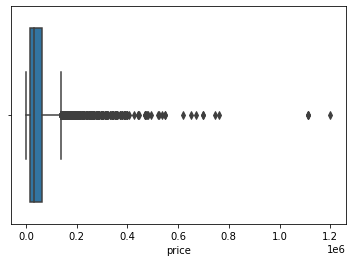

In [40]:
df = outliers(df,'price')

6.0


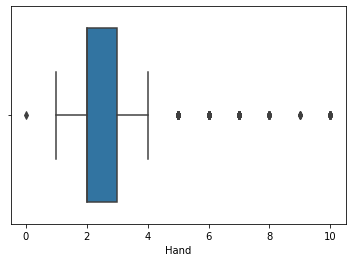

In [41]:
df = outliers(df,'Hand')

344000.0


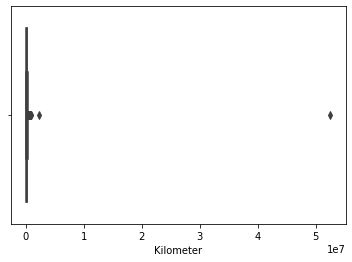

In [42]:
df = outliers(df,'Kilometer')

4143.0


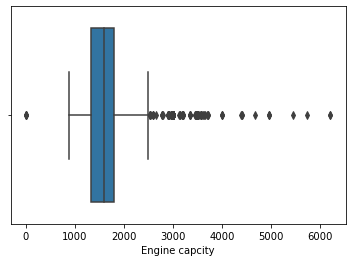

In [43]:
df = outliers(df,'Engine capcity')

2023.0


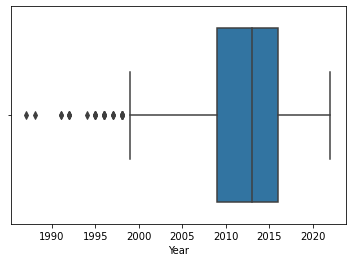

In [44]:
df = outliers(df,'Year')

In [45]:
df.to_csv('all_cars.csv')

# The final DataFrame

## This is the final data we will work on.

In [46]:
df

,price,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,28000.0,2014.0,3.0,158000.0,פתח תקוה והסביבה,אוטומטית,1000.0,שחור,יונדאי,i10
1,30000.0,2013.0,5.0,117000.0,מושבים בשפלה,אוטומטית,1400.0,אפור,יונדאי,i20
2,33000.0,2011.0,3.0,105000.0,נס ציונה - רחובות,אוטומטית,1560.0,אפור,יונדאי,i25
3,28000.0,2013.0,2.0,220000.0,פתח תקוה והסביבה,אוטומטית,1590.0,כחול מטאלי,יונדאי,i30cw
5,21000.0,2010.0,3.0,167000.0,פתח תקוה והסביבה,אוטומטית,1600.0,תכלת,יונדאי,i30cw
...,...,...,...,...,...,...,...,...,...,...
7472,45000.0,2009.0,2.0,2.0,ירושלים והסביבה,אוטומטית,1598.0,שחור,מיני,קופר
7474,180000.0,2021.0,1.0,3000.0,מושבים בצפון,אוטומטית,1499.0,אפור עכבר,מיני,קופר
7476,34000.0,2012.0,3.0,190000.0,מושבים במרכז,ידנית,1598.0,קרם,מיני,ONE
7477,150000.0,2017.0,4.0,65000.0,פתח תקוה והסביבה,אוטומטית,1998.0,כסוף,מיני,JCW


## Create a DataFrame of averages by manufacturer

we create another dataframe for the Visualization part to help decide which car is the best for us to buy.

In [47]:
df_hyundai = convertion(df_hyundai)
df_volkswagen = convertion(df_volkswagen)
df_kia = convertion(df_kia)
df_suzuki = convertion(df_suzuki)
df_mercedes = convertion(df_mercedes)
df_toyota = convertion(df_toyota)
df_mazda = convertion(df_mazda)
df_skoda = convertion(df_skoda)
df_chevrolet = convertion(df_chevrolet)
df_honda = convertion(df_honda)
df_seat = convertion(df_seat)
df_bmw = convertion(df_bmw)
df_renault = convertion(df_renault)
df_peugeot = convertion(df_peugeot)
df_ford = convertion(df_ford)
df_audi = convertion(df_audi)
df_subaru = convertion(df_subaru)
df_citroen = convertion(df_citroen)
df_opel = convertion(df_opel)
df_mitsubishi = convertion(df_mitsubishi)
df_nissan = convertion(df_nissan)
df_fiat = convertion(df_fiat)
df_volvo = convertion(df_volvo)
df_alphaRomeo = convertion(df_alphaRomeo)
df_daihatsu = convertion(df_daihatsu)
df_mini = convertion(df_mini)

In [48]:
df_hyundai = dropCols(df_hyundai)
df_volkswagen = dropCols(df_volkswagen)
df_kia = dropCols(df_kia)
df_suzuki = dropCols(df_suzuki)
df_mercedes = dropCols(df_mercedes)
df_toyota = dropCols(df_toyota)
df_mazda = dropCols(df_mazda)
df_skoda = dropCols(df_skoda)
df_chevrolet = dropCols(df_chevrolet)
df_honda = dropCols(df_honda)
df_seat = dropCols(df_seat)
df_bmw = dropCols(df_bmw)
df_renault = dropCols(df_renault)
df_peugeot = dropCols(df_peugeot)
df_ford = dropCols(df_ford)
df_audi = dropCols(df_audi)
df_subaru = dropCols(df_subaru)
df_citroen = dropCols(df_citroen)
df_opel = dropCols(df_opel)
df_mitsubishi = dropCols(df_mitsubishi)
df_nissan = dropCols(df_nissan)
df_fiat = dropCols(df_fiat)
df_volvo = dropCols(df_volvo)
df_alphaRomeo = dropCols(df_alphaRomeo)
df_daihatsu = dropCols(df_daihatsu)
df_mini = dropCols(df_mini)

In [49]:
df_hyundai = replace_to_int(df_hyundai)
df_volkswagen = replace_to_int(df_volkswagen)
df_kia = replace_to_int(df_kia)
df_suzuki = replace_to_int(df_suzuki)
df_mercedes = replace_to_int(df_mercedes)
df_toyota = replace_to_int(df_toyota)
df_mazda = replace_to_int(df_mazda)
df_skoda = replace_to_int(df_skoda)
df_chevrolet = replace_to_int(df_chevrolet)
df_honda = replace_to_int(df_honda)
df_seat = replace_to_int(df_seat)
df_bmw = replace_to_int(df_bmw)
df_renault = replace_to_int(df_renault)
df_peugeot = replace_to_int(df_peugeot)
df_ford = replace_to_int(df_ford)
df_audi = replace_to_int(df_audi)
df_subaru = replace_to_int(df_subaru)
df_citroen = replace_to_int(df_citroen)
df_opel = replace_to_int(df_opel)
df_mitsubishi = replace_to_int(df_mitsubishi)
df_nissan = replace_to_int(df_nissan)
df_fiat = replace_to_int(df_fiat)
df_volvo = replace_to_int(df_volvo)
df_alphaRomeo = replace_to_int(df_alphaRomeo)
df_daihatsu = replace_to_int(df_daihatsu)
df_mini = replace_to_int(df_mini)

### We created a lists to add to the avg dataframe.

In [50]:
manufacturer_name_list = []

manufacturer_name_list.append("hyundai")
manufacturer_name_list.append("volkswagen")
manufacturer_name_list.append("kia")
manufacturer_name_list.append("suzuki")
manufacturer_name_list.append("mercedes")
manufacturer_name_list.append("toyota")
manufacturer_name_list.append("mazda")
manufacturer_name_list.append("skoda")
manufacturer_name_list.append("chevrolet")
manufacturer_name_list.append("honda")
manufacturer_name_list.append("seat")
manufacturer_name_list.append("bmw")
manufacturer_name_list.append("renault")
manufacturer_name_list.append("peugeot")
manufacturer_name_list.append("ford")
manufacturer_name_list.append("audi")
manufacturer_name_list.append("subaru")
manufacturer_name_list.append("citroen")
manufacturer_name_list.append("opel")
manufacturer_name_list.append("mitsubishi")
manufacturer_name_list.append("nissan")
manufacturer_name_list.append("fiat")
manufacturer_name_list.append("volvo")
manufacturer_name_list.append("alphaRomeo")
manufacturer_name_list.append("daihatsu")
manufacturer_name_list.append("mini")

In [51]:
avg_price_list = []

avg_price_list.append(df_hyundai["price"].mean())
avg_price_list.append(df_volkswagen["price"].mean())
avg_price_list.append(df_kia["price"].mean())
avg_price_list.append(df_suzuki["price"].mean())
avg_price_list.append(df_mercedes["price"].mean())
avg_price_list.append(df_toyota["price"].mean())
avg_price_list.append(df_mazda["price"].mean())
avg_price_list.append(df_skoda["price"].mean())
avg_price_list.append(df_chevrolet["price"].mean())
avg_price_list.append(df_honda["price"].mean())
avg_price_list.append(df_seat["price"].mean())
avg_price_list.append(df_bmw["price"].mean())
avg_price_list.append(df_renault["price"].mean())
avg_price_list.append(df_peugeot["price"].mean())
avg_price_list.append(df_ford["price"].mean())
avg_price_list.append(df_audi["price"].mean())
avg_price_list.append(df_subaru["price"].mean())
avg_price_list.append(df_citroen["price"].mean())
avg_price_list.append(df_opel["price"].mean())
avg_price_list.append(df_mitsubishi["price"].mean())
avg_price_list.append(df_nissan["price"].mean())
avg_price_list.append(df_fiat["price"].mean())
avg_price_list.append(df_volvo["price"].mean())
avg_price_list.append(df_alphaRomeo["price"].mean())
avg_price_list.append(df_daihatsu["price"].mean())
avg_price_list.append(df_mini["price"].mean())


In [52]:
avg_hand_list = []

avg_hand_list.append(df_hyundai["Hand"].mean())
avg_hand_list.append(df_volkswagen["Hand"].mean())
avg_hand_list.append(df_kia["Hand"].mean())
avg_hand_list.append(df_suzuki["Hand"].mean())
avg_hand_list.append(df_mercedes["Hand"].mean())
avg_hand_list.append(df_toyota["Hand"].mean())
avg_hand_list.append(df_mazda["Hand"].mean())
avg_hand_list.append(df_skoda["Hand"].mean())
avg_hand_list.append(df_chevrolet["Hand"].mean())
avg_hand_list.append(df_honda["Hand"].mean())
avg_hand_list.append(df_seat["Hand"].mean())
avg_hand_list.append(df_bmw["Hand"].mean())
avg_hand_list.append(df_renault["Hand"].mean())
avg_hand_list.append(df_peugeot["Hand"].mean())
avg_hand_list.append(df_ford["Hand"].mean())
avg_hand_list.append(df_audi["Hand"].mean())
avg_hand_list.append(df_subaru["Hand"].mean())
avg_hand_list.append(df_citroen["Hand"].mean())
avg_hand_list.append(df_opel["Hand"].mean())
avg_hand_list.append(df_mitsubishi["Hand"].mean())
avg_hand_list.append(df_nissan["Hand"].mean())
avg_hand_list.append(df_fiat["Hand"].mean())
avg_hand_list.append(df_volvo["Hand"].mean())
avg_hand_list.append(df_alphaRomeo["Hand"].mean())
avg_hand_list.append(df_daihatsu["Hand"].mean())
avg_hand_list.append(df_mini["Hand"].mean())


In [53]:
avg_kilometer_list = []

avg_kilometer_list.append(df_hyundai["Kilometer"].mean())
avg_kilometer_list.append(df_volkswagen["Kilometer"].mean())
avg_kilometer_list.append(df_kia["Kilometer"].mean())
avg_kilometer_list.append(df_suzuki["Kilometer"].mean())
avg_kilometer_list.append(df_mercedes["Kilometer"].mean())
avg_kilometer_list.append(df_toyota["Kilometer"].mean())
avg_kilometer_list.append(df_mazda["Kilometer"].mean())
avg_kilometer_list.append(df_skoda["Kilometer"].mean())
avg_kilometer_list.append(df_chevrolet["Kilometer"].mean())
avg_kilometer_list.append(df_honda["Kilometer"].mean())
avg_kilometer_list.append(df_seat["Kilometer"].mean())
avg_kilometer_list.append(df_bmw["Kilometer"].mean())
avg_kilometer_list.append(df_renault["Kilometer"].mean())
avg_kilometer_list.append(df_peugeot["Kilometer"].mean())
avg_kilometer_list.append(df_ford["Kilometer"].mean())
avg_kilometer_list.append(df_audi["Kilometer"].mean())
avg_kilometer_list.append(df_subaru["Kilometer"].mean())
avg_kilometer_list.append(df_citroen["Kilometer"].mean())
avg_kilometer_list.append(df_opel["Kilometer"].mean())
avg_kilometer_list.append(df_mitsubishi["Kilometer"].mean())
avg_kilometer_list.append(df_nissan["Kilometer"].mean())
avg_kilometer_list.append(df_fiat["Kilometer"].mean())
avg_kilometer_list.append(df_volvo["Kilometer"].mean())
avg_kilometer_list.append(df_alphaRomeo["Kilometer"].mean())
avg_kilometer_list.append(df_daihatsu["Kilometer"].mean())
avg_kilometer_list.append(df_mini["Kilometer"].mean())


In [54]:
avg_year_list = []

avg_year_list.append(df_hyundai["Year"].mean())
avg_year_list.append(df_volkswagen["Year"].mean())
avg_year_list.append(df_kia["Year"].mean())
avg_year_list.append(df_suzuki["Year"].mean())
avg_year_list.append(df_mercedes["Year"].mean())
avg_year_list.append(df_toyota["Year"].mean())
avg_year_list.append(df_mazda["Year"].mean())
avg_year_list.append(df_skoda["Year"].mean())
avg_year_list.append(df_chevrolet["Year"].mean())
avg_year_list.append(df_honda["Year"].mean())
avg_year_list.append(df_seat["Year"].mean())
avg_year_list.append(df_bmw["Year"].mean())
avg_year_list.append(df_renault["Year"].mean())
avg_year_list.append(df_peugeot["Year"].mean())
avg_year_list.append(df_ford["Year"].mean())
avg_year_list.append(df_audi["Year"].mean())
avg_year_list.append(df_subaru["Year"].mean())
avg_year_list.append(df_citroen["Year"].mean())
avg_year_list.append(df_opel["Year"].mean())
avg_year_list.append(df_mitsubishi["Year"].mean())
avg_year_list.append(df_nissan["Year"].mean())
avg_year_list.append(df_fiat["Year"].mean())
avg_year_list.append(df_volvo["Year"].mean())
avg_year_list.append(df_alphaRomeo["Year"].mean())
avg_year_list.append(df_daihatsu["Year"].mean())
avg_year_list.append(df_mini["Year"].mean())

In [55]:
avg_engine_capcity_list = []

avg_engine_capcity_list.append(df_hyundai["Engine capcity"].mean())
avg_engine_capcity_list.append(df_volkswagen["Engine capcity"].mean())
avg_engine_capcity_list.append(df_kia["Engine capcity"].mean())
avg_engine_capcity_list.append(df_suzuki["Engine capcity"].mean())
avg_engine_capcity_list.append(df_mercedes["Engine capcity"].mean())
avg_engine_capcity_list.append(df_toyota["Engine capcity"].mean())
avg_engine_capcity_list.append(df_mazda["Engine capcity"].mean())
avg_engine_capcity_list.append(df_skoda["Engine capcity"].mean())
avg_engine_capcity_list.append(df_chevrolet["Engine capcity"].mean())
avg_engine_capcity_list.append(df_honda["Engine capcity"].mean())
avg_engine_capcity_list.append(df_seat["Engine capcity"].mean())
avg_engine_capcity_list.append(df_bmw["Engine capcity"].mean())
avg_engine_capcity_list.append(df_renault["Engine capcity"].mean())
avg_engine_capcity_list.append(df_peugeot["Engine capcity"].mean())
avg_engine_capcity_list.append(df_ford["Engine capcity"].mean())
avg_engine_capcity_list.append(df_audi["Engine capcity"].mean())
avg_engine_capcity_list.append(df_subaru["Engine capcity"].mean())
avg_engine_capcity_list.append(df_citroen["Engine capcity"].mean())
avg_engine_capcity_list.append(df_opel["Engine capcity"].mean())
avg_engine_capcity_list.append(df_mitsubishi["Engine capcity"].mean())
avg_engine_capcity_list.append(df_nissan["Engine capcity"].mean())
avg_engine_capcity_list.append(df_fiat["Engine capcity"].mean())
avg_engine_capcity_list.append(df_volvo["Engine capcity"].mean())
avg_engine_capcity_list.append(df_alphaRomeo["Engine capcity"].mean())
avg_engine_capcity_list.append(df_daihatsu["Engine capcity"].mean())
avg_engine_capcity_list.append(df_mini["Engine capcity"].mean())

In [56]:
df_avarege = pd.DataFrame({"Manufacturer":manufacturer_name_list,
                            "Avarege price":avg_price_list,
                            "Avarege kilometer":avg_kilometer_list,
                            "Avarege year":avg_year_list,
                            "Avarege hand":avg_hand_list, 
                            "Avarege engine capcity":avg_engine_capcity_list})

# The final avarege DataFrame

we will see the use for this dataframe in the visualizations part.

In [57]:
df_avarege.to_csv("avarege car information.csv")

In [58]:
df_avarege

,Manufacturer,Avarege price,Avarege kilometer,Avarege year,Avarege hand,Avarege engine capcity
0,hyundai,34478.572650,141324.358974,2012.416667,2.551282,1342.072650
1,volkswagen,44932.680191,145564.911695,2011.307876,2.661098,1505.627685
2,kia,45208.338583,317958.255906,2015.039370,2.141732,1355.901575
3,suzuki,32426.258555,144180.513308,2011.619772,2.258555,1411.840304
4,mercedes,176158.375000,173089.541667,2014.199405,2.511905,2251.610119
5,toyota,46002.426778,162776.742678,2011.456067,2.246862,1592.748954
6,mazda,36248.100559,174432.201117,2009.882682,2.862197,1942.148976
7,skoda,67974.838057,141281.795547,2014.587045,2.240891,1513.151822
8,chevrolet,40885.723270,127538.503145,2012.477987,2.515723,1896.522013
9,honda,35094.686636,176441.829493,2009.543779,2.930876,1717.520737
